# TELCO Churn Data

## Acquire:

In [64]:
import acquire as aq
import prepare as prep
import explore
import model_functions as model

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
telco_df = aq.get_telco_data() #Acquire function brings in TELCO data from SQL server

In [3]:
telco_df.head()

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 3  0016-QLJIS   
1                4                         1                 3  0017-DINOC   
2                3                         1                 3  0019-GFNTW   
3                4                         1                 3  0056-EPFBG   
4                3                         1                 3  0078-XZMHT   

   gender  senior_citizen partner dependents  tenure phone_service  ...  \
0  Female               0     Yes        Yes      65           Yes  ...   
1    Male               0      No         No      54            No  ...   
2  Female               0      No         No      56            No  ...   
3    Male               0     Yes        Yes      20            No  ...   
4    Male               0     Yes         No      72           Yes  ...   

  tech_support streaming_tv streaming_movies paperless_billing  \
0          Yes          Yes              Yes               Yes   
1          Yes          Yes               No                No   
2          Yes           No               No                No   
3          Yes           No               No               Yes   
4          Yes          Yes              Yes               Yes   

  monthly_charges total_charges churn contract_type  internet_service_type  \
0           90.45        5957.9    No      Two year                    DSL   
1           45.20       2460.55    No      Two year                    DSL   
2           45.05        2560.1    No      Two year                    DSL   
3           39.40         825.4    No      Two year                    DSL   
4           85.15        6316.2    No      Two year                    DSL   

                payment_type  
0               Mailed check  
1    Credit card (automatic)  
2  Bank transfer (automatic)  
3    Credit card (automatic)  
4  Bank transfer (automatic)  

[5 rows x 24 columns]

## Prepare Data

In [4]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
telco_df.isnull().sum() # No nulls

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [6]:
telco_df.total_charges = telco_df.total_charges.str.strip()

In [7]:
telco_df[telco_df.total_charges == ''] # need to replace total_charges with 0 for tenure 0

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
85                  4                         1                 3  1371-DWPAZ   
156                 3                         1                 3  2775-SEFEE   
236                 2                         1                 3  4075-WKNIU   
255                 3                         1                 3  4472-LVYGI   
339                 2                         1                 3  5709-LVOEQ   
5681                2                         3                 3  2520-SGTTA   
5717                2                         3                 3  3115-CZMZD   
5727                2                         3                 3  3213-VVOLG   
5798                2                         3                 3  4367-NUYAO   
6007                2                         3                 3  7644-OMVMY   
6257                2                         3                 2  2923-ARZLG   

      gender  senior_citizen partner dependents  tenure phone_service  ...  \
85    Female               0     Yes        Yes       0            No  ...   
156     Male               0      No        Yes       0           Yes  ...   
236   Female               0     Yes        Yes       0           Yes  ...   
255   Female               0     Yes        Yes       0            No  ...   
339   Female               0     Yes        Yes       0           Yes  ...   
5681  Female               0     Yes        Yes       0           Yes  ...   
5717    Male               0      No        Yes       0           Yes  ...   
5727    Male               0     Yes        Yes       0           Yes  ...   
5798    Male               0     Yes        Yes       0           Yes  ...   
6007    Male               0     Yes        Yes       0           Yes  ...   
6257    Male               0     Yes        Yes       0           Yes  ...   

             tech_support         streaming_tv     streaming_movies  \
85                    Yes                  Yes                   No   
156                   Yes                   No                   No   
236                   Yes                  Yes                   No   
255                   Yes                  Yes                   No   
339                    No                  Yes                  Yes   
5681  No internet service  No internet service  No internet service   
5717  No internet service  No internet service  No internet service   
5727  No internet service  No internet service  No internet service   
5798  No internet service  No internet service  No internet service   
6007  No internet service  No internet service  No internet service   
6257  No internet service  No internet service  No internet service   

     paperless_billing monthly_charges total_charges churn contract_type  \
85                  No           56.05                  No      Two year   
156                Yes           61.90                  No      Two year   
236                 No           73.35                  No      Two year   
255                Yes           52.55                  No      Two year   
339                 No           80.85                  No      Two year   
5681                No           20.00                  No      Two year   
5717                No           20.25                  No      Two year   
5727                No           25.35                  No      Two year   
5798                No           25.75                  No      Two year   
6007                No           19.85                  No      Two year   
6257               Yes           19.70                  No      One year   

      internet_service_type               payment_type  
85                      DSL    Credit card (automatic)  
156                     DSL  Bank transfer (automatic)  
236                     DSL               Mailed check  
255                     DSL  Bank transfer (automatic)  
339                     DSL               Mai

In [8]:
telco_df.total_charges = telco_df.total_charges.replace('', 0) 

In [9]:
telco_df.total_charges = telco_df.total_charges.astype('float64')

In [10]:
telco_df[telco_df.total_charges == 0]

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
85                  4                         1                 3  1371-DWPAZ   
156                 3                         1                 3  2775-SEFEE   
236                 2                         1                 3  4075-WKNIU   
255                 3                         1                 3  4472-LVYGI   
339                 2                         1                 3  5709-LVOEQ   
5681                2                         3                 3  2520-SGTTA   
5717                2                         3                 3  3115-CZMZD   
5727                2                         3                 3  3213-VVOLG   
5798                2                         3                 3  4367-NUYAO   
6007                2                         3                 3  7644-OMVMY   
6257                2                         3                 2  2923-ARZLG   

      gender  senior_citizen partner dependents  tenure phone_service  ...  \
85    Female               0     Yes        Yes       0            No  ...   
156     Male               0      No        Yes       0           Yes  ...   
236   Female               0     Yes        Yes       0           Yes  ...   
255   Female               0     Yes        Yes       0            No  ...   
339   Female               0     Yes        Yes       0           Yes  ...   
5681  Female               0     Yes        Yes       0           Yes  ...   
5717    Male               0      No        Yes       0           Yes  ...   
5727    Male               0     Yes        Yes       0           Yes  ...   
5798    Male               0     Yes        Yes       0           Yes  ...   
6007    Male               0     Yes        Yes       0           Yes  ...   
6257    Male               0     Yes        Yes       0           Yes  ...   

             tech_support         streaming_tv     streaming_movies  \
85                    Yes                  Yes                   No   
156                   Yes                   No                   No   
236                   Yes                  Yes                   No   
255                   Yes                  Yes                   No   
339                    No                  Yes                  Yes   
5681  No internet service  No internet service  No internet service   
5717  No internet service  No internet service  No internet service   
5727  No internet service  No internet service  No internet service   
5798  No internet service  No internet service  No internet service   
6007  No internet service  No internet service  No internet service   
6257  No internet service  No internet service  No internet service   

     paperless_billing monthly_charges total_charges churn contract_type  \
85                  No           56.05           0.0    No      Two year   
156                Yes           61.90           0.0    No      Two year   
236                 No           73.35           0.0    No      Two year   
255                Yes           52.55           0.0    No      Two year   
339                 No           80.85           0.0    No      Two year   
5681                No           20.00           0.0    No      Two year   
5717                No           20.25           0.0    No      Two year   
5727                No           25.35           0.0    No      Two year   
5798                No           25.75           0.0    No      Two year   
6007                No           19.85           0.0    No      Two year   
6257               Yes           19.70           0.0    No      One year   

      internet_service_type               payment_type  
85                      DSL    Credit card (automatic)  
156                     DSL  Bank transfer (automatic)  
236                     DSL               Mailed check  
255                     DSL  Bank transfer (automatic)  
339                     DSL               Mai

In [11]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [12]:
telco_df.drop_duplicates() # No duplicates

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                   2                         1                 3  0016-QLJIS   
1                   4                         1                 3  0017-DINOC   
2                   3                         1                 3  0019-GFNTW   
3                   4                         1                 3  0056-EPFBG   
4                   3                         1                 3  0078-XZMHT   
...               ...                       ...               ...         ...   
7038                2                         3                 1  9962-BFPDU   
7039                2                         3                 1  9967-ATRFS   
7040                4                         3                 1  9970-QBCDA   
7041                2                         3                 1  9975-SKRNR   
7042                3                         3                 1  9986-BONCE   

      gender  senior_citizen partner dependents  tenure phone_service  ...  \
0     Female               0     Yes        Yes      65           Yes  ...   
1       Male               0      No         No      54            No  ...   
2     Female               0      No         No      56            No  ...   
3       Male               0     Yes        Yes      20            No  ...   
4       Male               0     Yes         No      72           Yes  ...   
...      ...             ...     ...        ...     ...           ...  ...   
7038  Female               0     Yes        Yes       1           Yes  ...   
7039  Female               0      No         No      19           Yes  ...   
7040  Female               0      No         No       6           Yes  ...   
7041    Male               0      No         No       1           Yes  ...   
7042  Female               0      No         No       4           Yes  ...   

             tech_support         streaming_tv     streaming_movies  \
0                     Yes                  Yes                  Yes   
1                     Yes                  Yes                   No   
2                     Yes                   No                   No   
3                     Yes                   No                   No   
4                     Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039  No internet service  No internet service  No internet service   
7040  No internet service  No internet service  No internet service   
7041  No internet service  No internet service  No internet service   
7042  No internet service  No internet service  No internet service   

     paperless_billing monthly_charges total_charges churn   contract_type  \
0                  Yes           90.45       5957.90    No        Two year   
1                   No           45.20       2460.55    No        Two year   
2                   No           45.05       2560.10    No        Two year   
3                  Yes           39.40        825.40    No        Two year   
4                  Yes           85.15       6316.20    No        Two year   
...                ...             ...           ...   ...             ...   
7038                No           20.05         20.05    No  Month-to-month   
7039                No           19.90        367.55    No  Month-to-month   
7040                No           19.70        129.55    No  Month-to-month   
7041                No           18.90         18.90    No  Month-to-month   
7042                No           20.95         85.50   Yes  Month-to-month   

      internet_service_type               payment_type  
0                       DSL               Mailed check  
1                       DSL    Credit card (automatic)  
2                       DSL  Bank transfer (automatic)  
3                       DSL    Credit card (automatic)  
4                    

In [13]:
telco_df.describe() # Not really helpful at this point

payment_type_id  internet_service_type_id  contract_type_id  \
count      7043.000000               7043.000000       7043.000000   
mean          2.315633                  1.872923          1.690473   
std           1.148907                  0.737796          0.833755   
min           1.000000                  1.000000          1.000000   
25%           1.000000                  1.000000          1.000000   
50%           2.000000                  2.000000          1.000000   
75%           3.000000                  2.000000          2.000000   
max           4.000000                  3.000000          3.000000   

       senior_citizen       tenure  monthly_charges  total_charges  
count     7043.000000  7043.000000      7043.000000    7043.000000  
mean         0.162147    32.371149        64.761692    2279.734304  
std          0.368612    24.559481        30.090047    2266.794470  
min          0.000000     0.000000        18.250000       0.000000  
25%          0.000000     9.000000        35.500000     398.550000  
50%          0.000000    29.000000        70.350000    1394.550000  
75%          0.000000    55.000000        89.850000    3786.600000  
max          1.000000    72.000000       118.750000    8684.800000

In [14]:
telco_df.shape

(7043, 24)

array([[<AxesSubplot:title={'center':'payment_type_id'}>,
        <AxesSubplot:title={'center':'internet_service_type_id'}>,
        <AxesSubplot:title={'center':'contract_type_id'}>],
       [<AxesSubplot:title={'center':'senior_citizen'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'monthly_charges'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

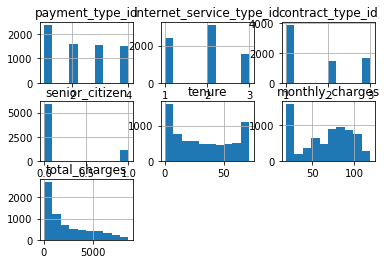

In [15]:
telco_df.hist()

In [16]:
#sns.pairplot(telco_df, hue='churn')

In [17]:
telco_df.head()

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 3  0016-QLJIS   
1                4                         1                 3  0017-DINOC   
2                3                         1                 3  0019-GFNTW   
3                4                         1                 3  0056-EPFBG   
4                3                         1                 3  0078-XZMHT   

   gender  senior_citizen partner dependents  tenure phone_service  ...  \
0  Female               0     Yes        Yes      65           Yes  ...   
1    Male               0      No         No      54            No  ...   
2  Female               0      No         No      56            No  ...   
3    Male               0     Yes        Yes      20            No  ...   
4    Male               0     Yes         No      72           Yes  ...   

  tech_support streaming_tv streaming_movies paperless_billing  \
0          Yes          Yes              Yes               Yes   
1          Yes          Yes               No                No   
2          Yes           No               No                No   
3          Yes           No               No               Yes   
4          Yes          Yes              Yes               Yes   

  monthly_charges total_charges churn contract_type  internet_service_type  \
0           90.45       5957.90    No      Two year                    DSL   
1           45.20       2460.55    No      Two year                    DSL   
2           45.05       2560.10    No      Two year                    DSL   
3           39.40        825.40    No      Two year                    DSL   
4           85.15       6316.20    No      Two year                    DSL   

                payment_type  
0               Mailed check  
1    Credit card (automatic)  
2  Bank transfer (automatic)  
3    Credit card (automatic)  
4  Bank transfer (automatic)  

[5 rows x 24 columns]

In [18]:
telco_df.tech_support.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

In [19]:
# Encoding
to_replace={'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0}
telco_df = telco_df.replace(to_replace)

In [20]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   int64  
 7   dependents                7043 non-null   int64  
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   int64  
 10  multiple_lines            7043 non-null   int64  
 11  online_security           7043 non-null   int64  
 12  online_backup             7043 non-null   int64  
 13  device_protection         7043 non-null   int64  
 14  tech_sup

In [21]:
telco_df.head(3)

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 3  0016-QLJIS   
1                4                         1                 3  0017-DINOC   
2                3                         1                 3  0019-GFNTW   

   gender  senior_citizen  partner  dependents  tenure  phone_service  ...  \
0  Female               0        1           1      65              1  ...   
1    Male               0        0           0      54              0  ...   
2  Female               0        0           0      56              0  ...   

   tech_support  streaming_tv  streaming_movies  paperless_billing  \
0             1             1                 1                  1   
1             1             1                 0                  0   
2             1             0                 0                  0   

   monthly_charges  total_charges  churn  contract_type  \
0            90.45        5957.90      0       Two year   
1            45.20        2460.55      0       Two year   
2            45.05        2560.10      0       Two year   

   internet_service_type               payment_type  
0                    DSL               Mailed check  
1                    DSL    Credit card (automatic)  
2                    DSL  Bank transfer (automatic)  

[3 rows x 24 columns]

In [22]:
columns_to_rename = {'contract_type': 'contract',
                   'internet_service_type': 'internet'}
telco_df = telco_df.rename(columns=columns_to_rename)
telco_df.head()

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 3  0016-QLJIS   
1                4                         1                 3  0017-DINOC   
2                3                         1                 3  0019-GFNTW   
3                4                         1                 3  0056-EPFBG   
4                3                         1                 3  0078-XZMHT   

   gender  senior_citizen  partner  dependents  tenure  phone_service  ...  \
0  Female               0        1           1      65              1  ...   
1    Male               0        0           0      54              0  ...   
2  Female               0        0           0      56              0  ...   
3    Male               0        1           1      20              0  ...   
4    Male               0        1           0      72              1  ...   

   tech_support  streaming_tv  streaming_movies  paperless_billing  \
0             1             1                 1                  1   
1             1             1                 0                  0   
2             1             0                 0                  0   
3             1             0                 0                  1   
4             1             1                 1                  1   

   monthly_charges  total_charges  churn  contract  internet  \
0            90.45        5957.90      0  Two year       DSL   
1            45.20        2460.55      0  Two year       DSL   
2            45.05        2560.10      0  Two year       DSL   
3            39.40         825.40      0  Two year       DSL   
4            85.15        6316.20      0  Two year       DSL   

                payment_type  
0               Mailed check  
1    Credit card (automatic)  
2  Bank transfer (automatic)  
3    Credit card (automatic)  
4  Bank transfer (automatic)  

[5 rows x 24 columns]

In [23]:
dummy_df = pd.get_dummies(telco_df[['gender', 'contract','internet', 'payment_type']])
dummy_df.head()

gender_Female  gender_Male  contract_Month-to-month  contract_One year  \
0              1            0                        0                  0   
1              0            1                        0                  0   
2              1            0                        0                  0   
3              0            1                        0                  0   
4              0            1                        0                  0   

   contract_Two year  internet_DSL  internet_Fiber optic  internet_None  \
0                  1             1                     0              0   
1                  1             1                     0              0   
2                  1             1                     0              0   
3                  1             1                     0              0   
4                  1             1                     0              0   

   payment_type_Bank transfer (automatic)  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       1   

   payment_type_Credit card (automatic)  payment_type_Electronic check  \
0                                     0                              0   
1                                     1                              0   
2                                     0                              0   
3                                     1                              0   
4                                     0                              0   

   payment_type_Mailed check  
0                          1  
1                          0  
2                          0  
3                          0  
4                          0

In [24]:
telco_df = pd.concat([telco_df, dummy_df], axis=1)
telco_df.head(3)

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 3  0016-QLJIS   
1                4                         1                 3  0017-DINOC   
2                3                         1                 3  0019-GFNTW   

   gender  senior_citizen  partner  dependents  tenure  phone_service  ...  \
0  Female               0        1           1      65              1  ...   
1    Male               0        0           0      54              0  ...   
2  Female               0        0           0      56              0  ...   

   contract_Month-to-month  contract_One year  contract_Two year  \
0                        0                  0                  1   
1                        0                  0                  1   
2                        0                  0                  1   

   internet_DSL  internet_Fiber optic  internet_None  \
0             1                     0              0   
1             1                     0              0   
2             1                     0              0   

   payment_type_Bank transfer (automatic)  \
0                                       0   
1                                       0   
2                                       1   

   payment_type_Credit card (automatic)  payment_type_Electronic check  \
0                                     0                              0   
1                                     1                              0   
2                                     0                              0   

   payment_type_Mailed check  
0                          1  
1                          0  
2                          0  

[3 rows x 36 columns]

In [25]:
# Making a list of colums to drop
columns_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'gender', 'contract', 'internet', 'payment_type']
telco_df = telco_df.drop(columns=columns_to_drop)
telco_df.head(3)

customer_id  senior_citizen  partner  dependents  tenure  phone_service  \
0  0016-QLJIS               0        1           1      65              1   
1  0017-DINOC               0        0           0      54              0   
2  0019-GFNTW               0        0           0      56              0   

   multiple_lines  online_security  online_backup  device_protection  ...  \
0               1                1              1                  1  ...   
1               0                1              0                  0  ...   
2               0                1              1                  1  ...   

   contract_Month-to-month  contract_One year  contract_Two year  \
0                        0                  0                  1   
1                        0                  0                  1   
2                        0                  0                  1   

   internet_DSL  internet_Fiber optic  internet_None  \
0             1                     0              0   
1             1                     0              0   
2             1                     0              0   

   payment_type_Bank transfer (automatic)  \
0                                       0   
1                                       0   
2                                       1   

   payment_type_Credit card (automatic)  payment_type_Electronic check  \
0                                     0                              0   
1                                     1                              0   
2                                     0                              0   

   payment_type_Mailed check  
0                          1  
1                          0  
2                          0  

[3 rows x 29 columns]

In [26]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7043 non-null   object 
 1   senior_citizen                          7043 non-null   int64  
 2   partner                                 7043 non-null   int64  
 3   dependents                              7043 non-null   int64  
 4   tenure                                  7043 non-null   int64  
 5   phone_service                           7043 non-null   int64  
 6   multiple_lines                          7043 non-null   int64  
 7   online_security                         7043 non-null   int64  
 8   online_backup                           7043 non-null   int64  
 9   device_protection                       7043 non-null   int64  
 10  tech_support                            7043 non-null   int6

In [27]:
# More renaming
columns_to_rename = {'gender_Female': 'female',
                   'gender_Male': 'male',
                    'contract_Month-to-month': 'monthly_contract',
                    'contract_One year': 'one_yr_contract',
                    'contract_Two year': 'two_yr_contract',
                    'internet_DSL': 'dsl',
                    'internet_Fiber optic': 'fiber',
                    'internet_None': 'no_internet',
                    'payment_type_Bank transfer (automatic)': 'bank_transfer',
                    'payment_type_Credit card (automatic)': 'credit_card',
                    'payment_type_Electronic check': 'electronic_check',
                    'payment_type_Mailed check': 'mailed_check'}
telco_df = telco_df.rename(columns=columns_to_rename)
telco_df.head()

customer_id  senior_citizen  partner  dependents  tenure  phone_service  \
0  0016-QLJIS               0        1           1      65              1   
1  0017-DINOC               0        0           0      54              0   
2  0019-GFNTW               0        0           0      56              0   
3  0056-EPFBG               0        1           1      20              0   
4  0078-XZMHT               0        1           0      72              1   

   multiple_lines  online_security  online_backup  device_protection  ...  \
0               1                1              1                  1  ...   
1               0                1              0                  0  ...   
2               0                1              1                  1  ...   
3               0                1              0                  1  ...   
4               1                0              1                  1  ...   

   monthly_contract  one_yr_contract  two_yr_contract  dsl  fiber  \
0                 0                0                1    1      0   
1                 0                0                1    1      0   
2                 0                0                1    1      0   
3                 0                0                1    1      0   
4                 0                0                1    1      0   

   no_internet  bank_transfer  credit_card  electronic_check  mailed_check  
0            0              0            0                 0             1  
1            0              0            1                 0             0  
2            0              1            0                 0             0  
3            0              0            1                 0             0  
4            0              1            0                 0             0  

[5 rows x 29 columns]

In [28]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   int64  
 3   dependents         7043 non-null   int64  
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   int64  
 6   multiple_lines     7043 non-null   int64  
 7   online_security    7043 non-null   int64  
 8   online_backup      7043 non-null   int64  
 9   device_protection  7043 non-null   int64  
 10  tech_support       7043 non-null   int64  
 11  streaming_tv       7043 non-null   int64  
 12  streaming_movies   7043 non-null   int64  
 13  paperless_billing  7043 non-null   int64  
 14  monthly_charges    7043 non-null   float64
 15  total_charges      7043 non-null   float64
 16  churn              7043 

In [29]:
# Testing py file
df = prep.prep_telco()
df.head()

customer_id  senior_citizen  partner  dependents  tenure  phone_service  \
0  0016-QLJIS               0        1           1      65              1   
1  0017-DINOC               0        0           0      54              0   
2  0019-GFNTW               0        0           0      56              0   
3  0056-EPFBG               0        1           1      20              0   
4  0078-XZMHT               0        1           0      72              1   

   multiple_lines  online_security  online_backup  device_protection  ...  \
0               1                1              1                  1  ...   
1               0                1              0                  0  ...   
2               0                1              1                  1  ...   
3               0                1              0                  1  ...   
4               1                0              1                  1  ...   

   monthly_contract  one_yr_contract  two_yr_contract  dsl  fiber no_internet  \
0                 0                0                1    1      0           0   
1                 0                0                1    1      0           0   
2                 0                0                1    1      0           0   
3                 0                0                1    1      0           0   
4                 0                0                1    1      0           0   

   bank_transfer  credit_card  electronic_check  mailed_check  
0              0            0                 0             1  
1              0            1                 0             0  
2              1            0                 0             0  
3              0            1                 0             0  
4              1            0                 0             0  

[5 rows x 29 columns]

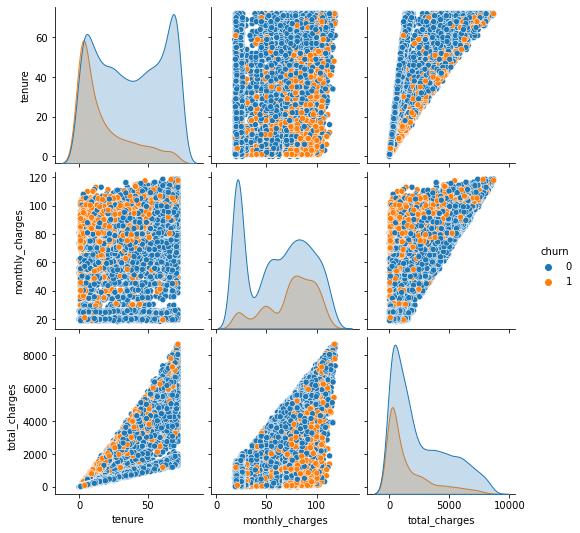

In [30]:
sns.pairplot(telco_df[['tenure', 'monthly_charges', 'total_charges', 'churn']], hue='churn')
plt.show()

### Train, Validate, Test

In [31]:
train, test = train_test_split(telco_df, test_size=.2, random_state=123, stratify=telco_df.churn)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 29)
validate -> (1691, 29)
test -> (1409, 29)


In [32]:
X_train = train.drop(columns=['customer_id', 'churn'])
y_train = train.churn

X_validate = validate.drop(columns=['customer_id', 'churn'])
y_validate = validate.churn

X_test = test.drop(columns=['customer_id', 'churn'])
y_test = test.churn

In [33]:
train.head(3)

customer_id  senior_citizen  partner  dependents  tenure  phone_service  \
5642  1982-FEBTD               0        1           1      23              1   
3338  8982-NHAVY               0        0           0      27              1   
4273  4115-NZRKS               1        0           0       7              1   

      multiple_lines  online_security  online_backup  device_protection  ...  \
5642               1                0              0                  0  ...   
3338               1                0              0                  1  ...   
4273               0                0              0                  0  ...   

      monthly_contract  one_yr_contract  two_yr_contract  dsl  fiber  \
5642                 0                0                1    0      0   
3338                 0                1                0    0      1   
4273                 1                0                0    0      1   

      no_internet  bank_transfer  credit_card  electronic_check  mailed_check  
5642            1              0            1                 0             0  
3338            0              1            0                 0             0  
4273            0              0            0                 1             0  

[3 rows x 29 columns]

### Exploring

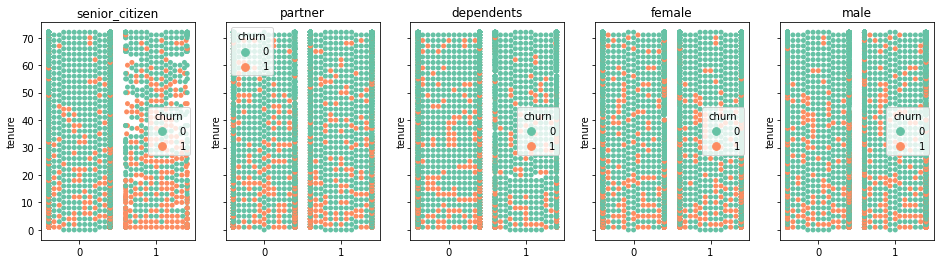

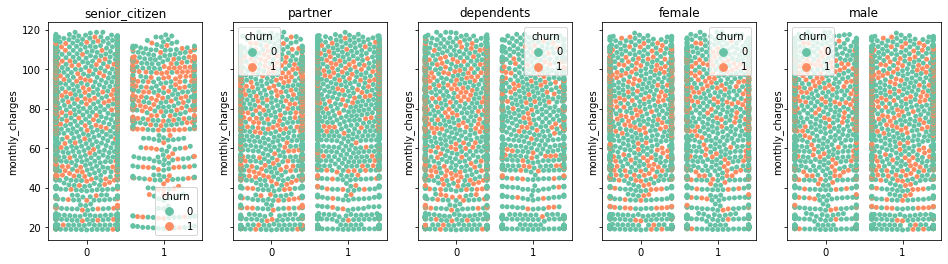

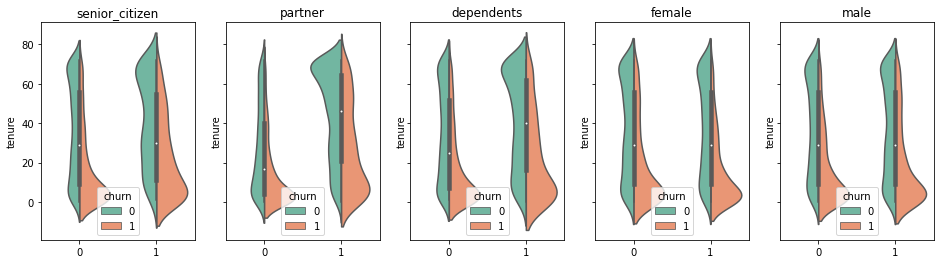

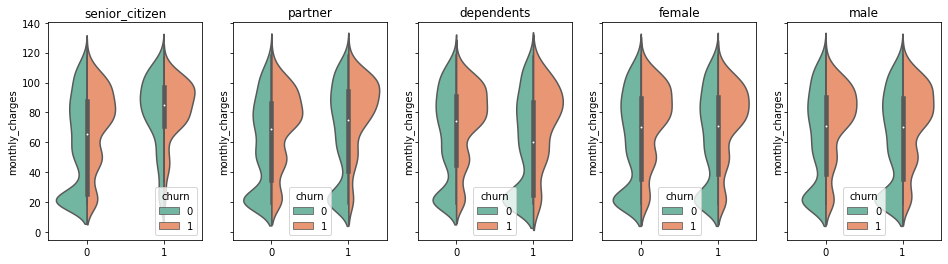

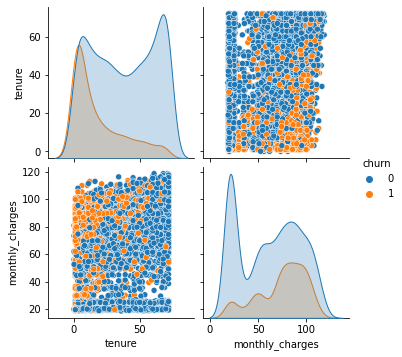

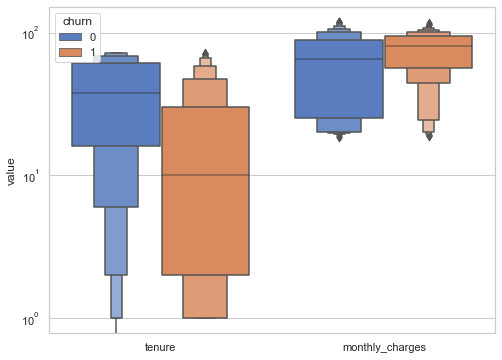

In [34]:
# Customer Type
target = 'churn'
cat_vars = ['senior_citizen', 'partner', 'dependents', 'female', 'male']
quant_vars = ['tenure', 'monthly_charges']

explore.explore_multivariate(train, target, cat_vars, quant_vars)

# Findings: 
# Larger cluster of churn in senior citizens
# Larger cluster of churn in higher monthly charges

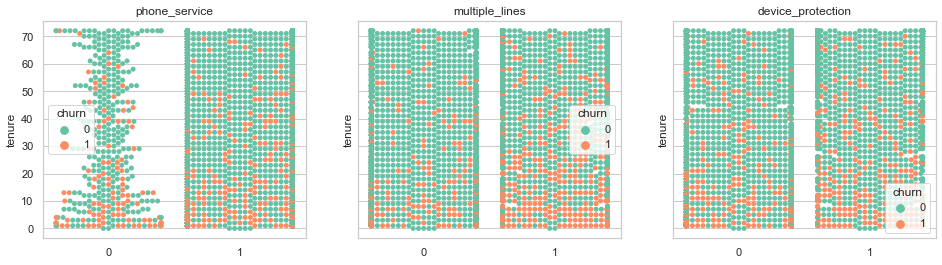

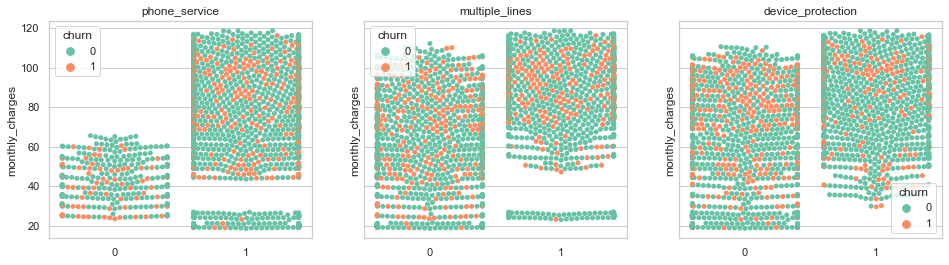

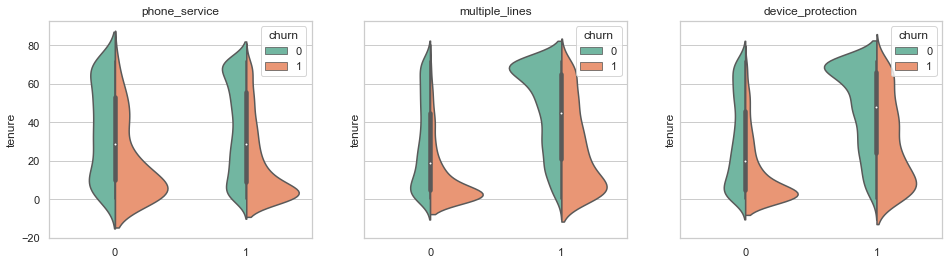

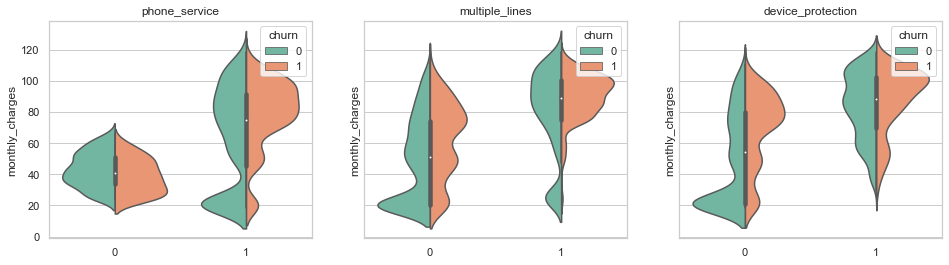

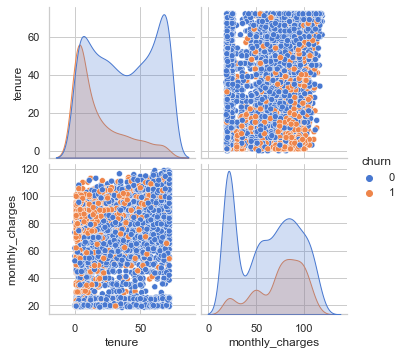

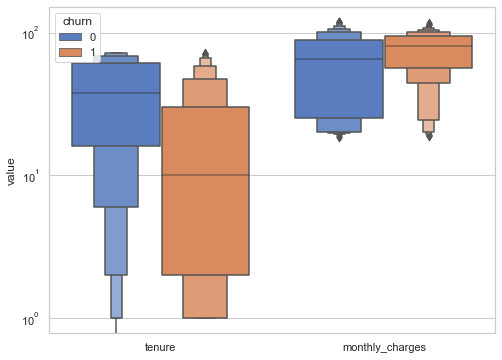

In [35]:
# Phone service
target = 'churn'
cat_vars = ['phone_service', 'multiple_lines', 'device_protection']
quant_vars = ['tenure', 'monthly_charges']

explore.explore_multivariate(train, target, cat_vars, quant_vars)

# More churn amongst higher monthly charges

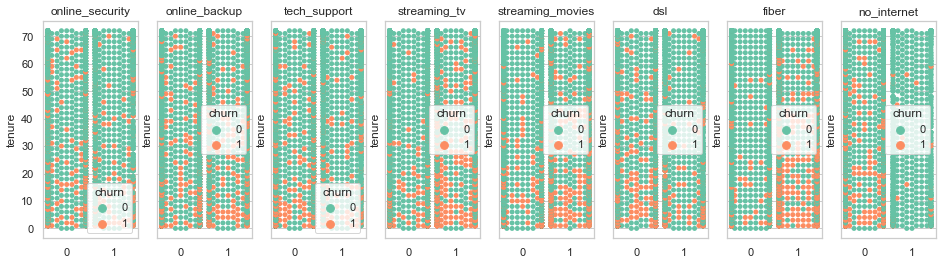

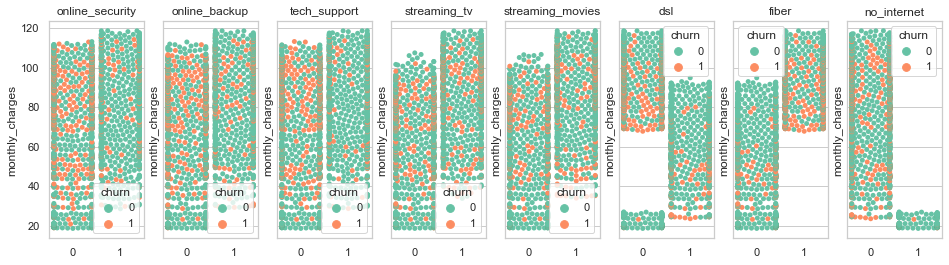

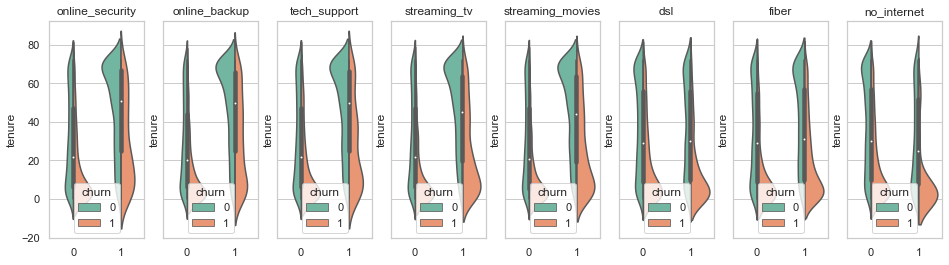

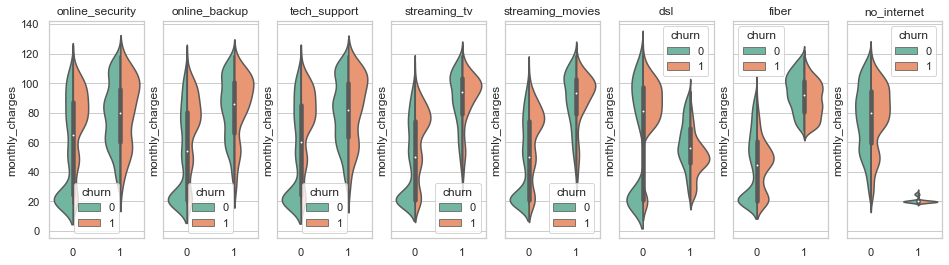

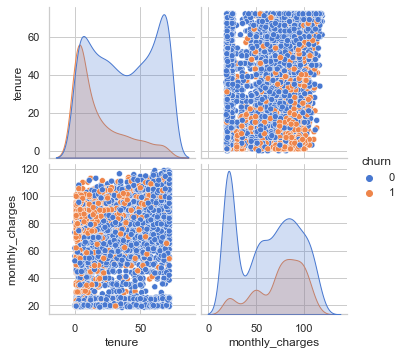

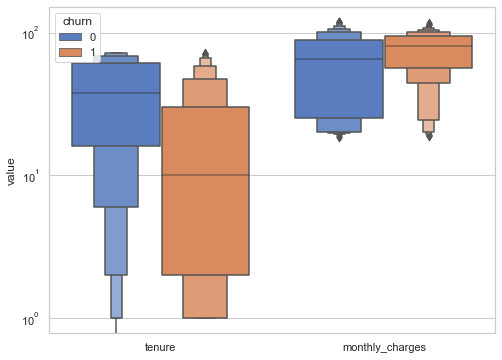

In [36]:
# Internet Service
target = 'churn'
cat_vars = ['online_security', 'online_backup', 'tech_support', 'streaming_tv', 'streaming_movies', 'dsl', 'fiber', 'no_internet']
quant_vars = ['tenure', 'monthly_charges']

explore.explore_multivariate(train, target, cat_vars, quant_vars)

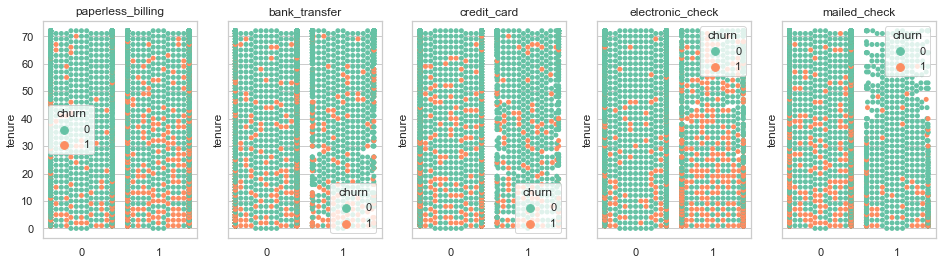

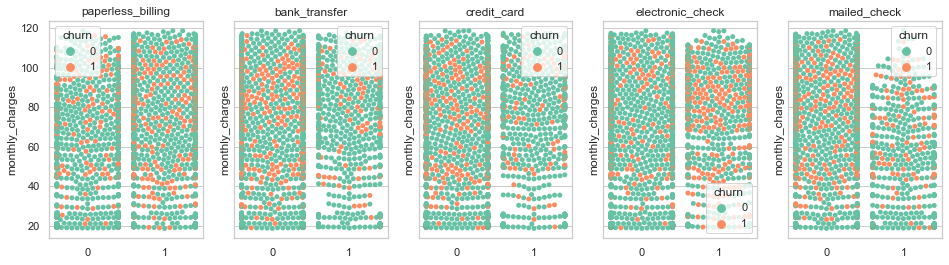

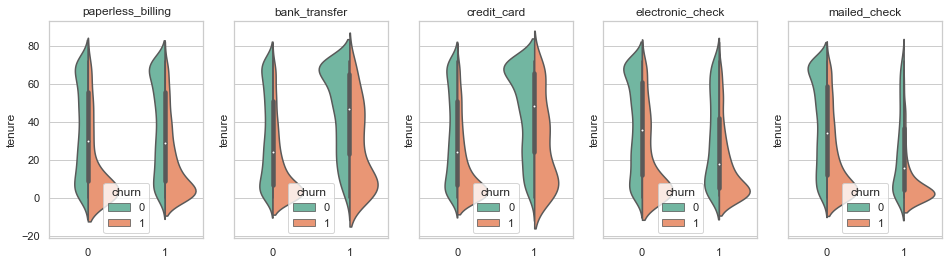

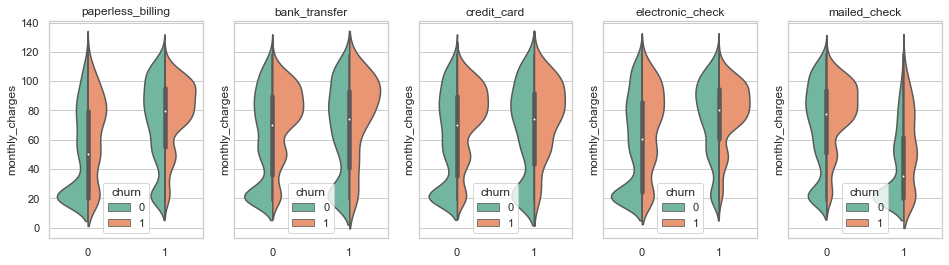

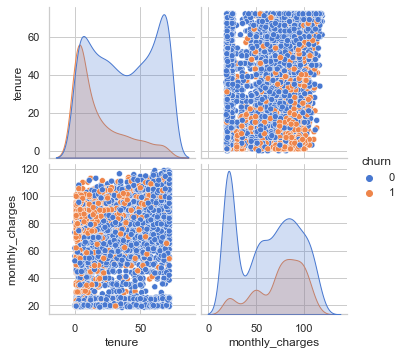

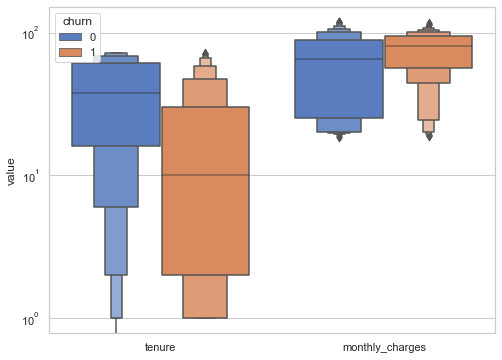

In [37]:
# Billing type
target = 'churn'
cat_vars = ['paperless_billing', 'bank_transfer', 'credit_card', 'electronic_check', 'mailed_check']
quant_vars = ['tenure', 'monthly_charges']

explore.explore_multivariate(train, target, cat_vars, quant_vars)
# Higher churn amongst customers that pay with electronic check

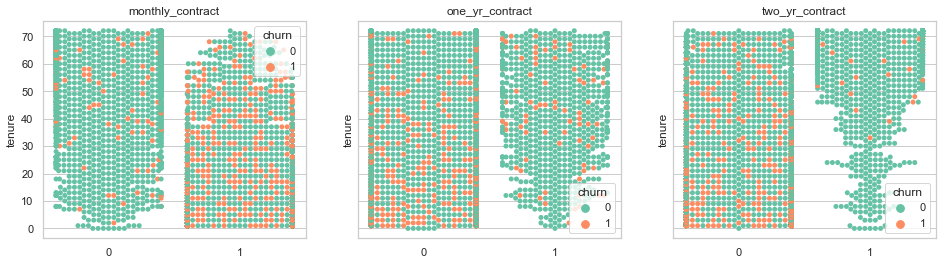

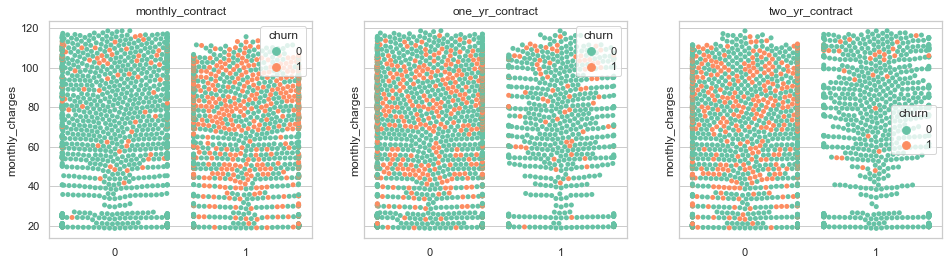

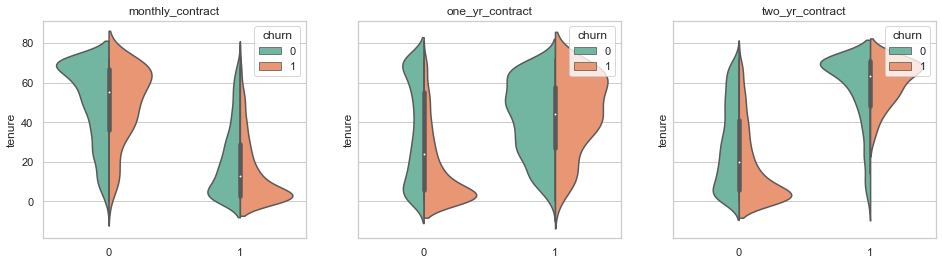

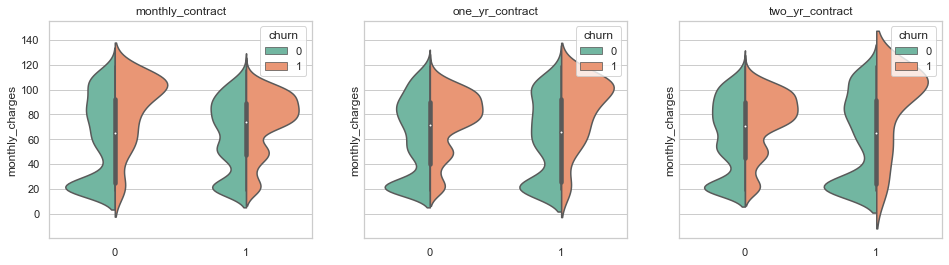

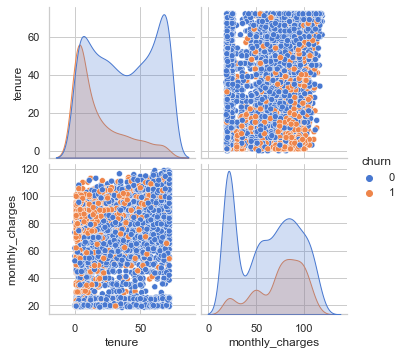

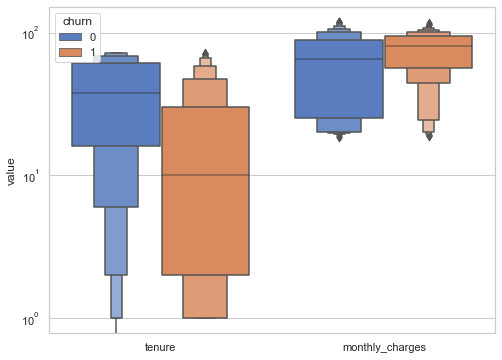

In [38]:
# Contract type
target = 'churn'
cat_vars = ['monthly_contract', 'one_yr_contract', 'two_yr_contract']
quant_vars = ['tenure', 'monthly_charges']

explore.explore_multivariate(train, target, cat_vars, quant_vars)

## Modeling - with all features

### Baseline

In [39]:
# 0: Remained a customer
# 1: Churned
telco_df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [40]:
# Baseline model accuracy using all telco data
5174/(5174+1869)

0.7346301292063041

In [41]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [42]:
# Baseline model accuracy using train data
2897/(2897+1046)

0.7347197565305605

### Decision Tree

   max_depth  train_accuracy  validate_accuracy  difference
0          2        0.760588           0.769367   -0.008779
1          3        0.792037           0.793613   -0.001577
2          4        0.795080           0.781786    0.013294
3          5        0.799391           0.782969    0.016423
4          6        0.815623           0.775872    0.039750
5          7        0.831854           0.776464    0.055390
6          8        0.845549           0.782377    0.063172


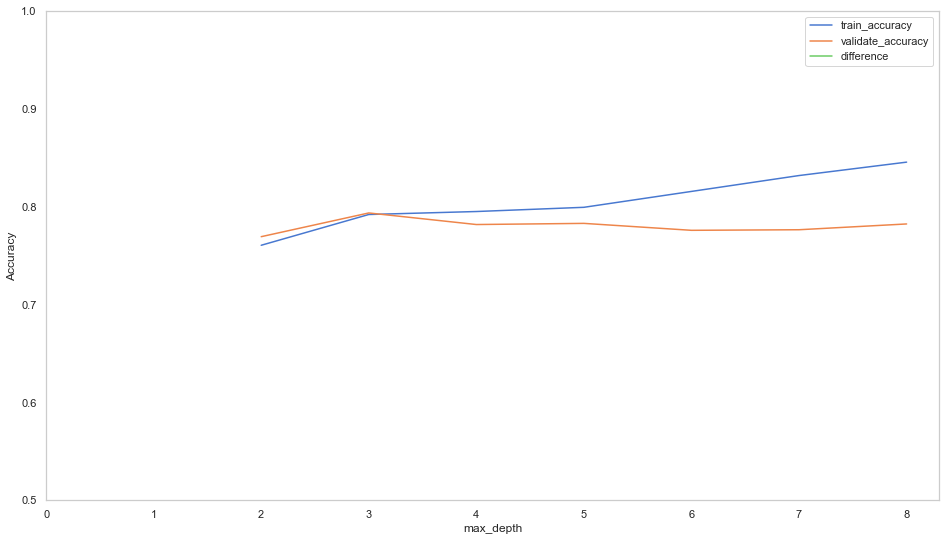

In [43]:
# Decision Tree

threshold = 0.10  # Set our threshold for how overfit we'll tolerate

models = []
metrics = []
max_dep = 25
for i in range(2, max_dep):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)   
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    # Calculate the difference
    difference = in_sample_accuracy - out_of_sample_accuracy
    
    # Add a conditional to check vs. the threshold
    if difference > threshold:
        break
    
    # Formulate the output for each model's performance on train and validate
    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy,
        "difference": difference
    }
    
    # Add the metrics dictionary to the list, so we can make a dataframe
    metrics.append(output)
    
    # Add the specific tree to a list of trained models
    models.append(tree)
    
df = pd.DataFrame(metrics)
df

# make a dataframe
results = pd.DataFrame(metrics)
print(results)

# plot the data
results.set_index('max_depth').plot(figsize = (16,9))
plt.ylim(0.50, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, i, 1))
plt.grid()

In [44]:
y_pred = tree.predict(X_train)
print(confusion_matrix(y_train, y_pred))

[[2697  200]
 [ 320  726]]


### Random Forest

    max_depth  min_samples_leaf  train_accuracy  validate_accuracy  difference
0           2                 2        0.768958           0.765819    0.003139
1           2                 3        0.768958           0.765819    0.003139
2           2                 4        0.768958           0.765819    0.003139
3           2                 5        0.768958           0.765819    0.003139
4           2                 6        0.768958           0.765819    0.003139
5           2                 7        0.768958           0.765819    0.003139
6           3                 2        0.788486           0.791839   -0.003353
7           3                 3        0.788486           0.791839   -0.003353
8           3                 4        0.788486           0.791839   -0.003353
9           3                 5        0.788486           0.791839   -0.003353
10          3                 6        0.788740           0.791839   -0.003100
11          3                 7        0.788740     

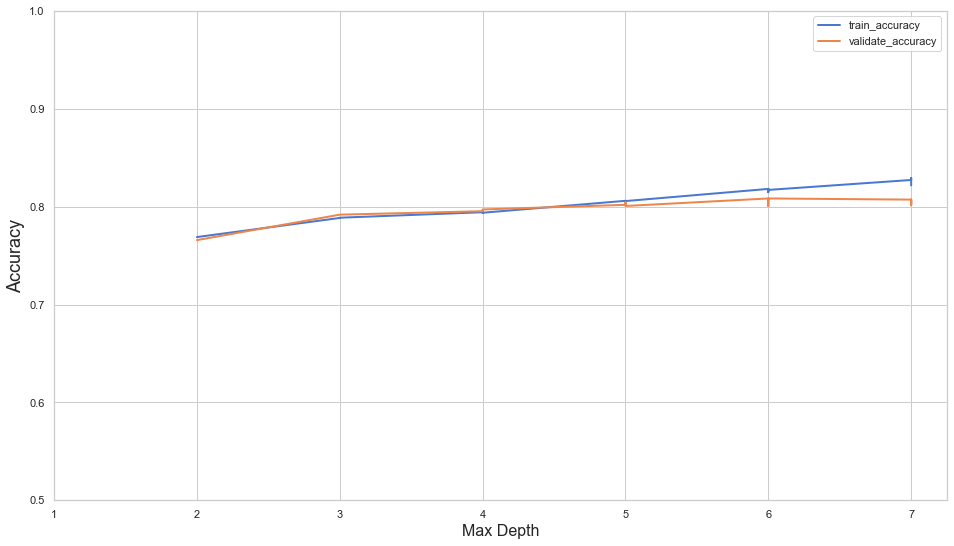

In [45]:
# This loop will adjust sample leaves and depth

threshold = 0.05            # Threshold of difference between train and validate accuracy

models = []                 # For output
metrics = []                # For output
for i in range(2, 8):
    for n in range(2, 8):
        # Make the model
        rf = RandomForestClassifier(bootstrap=True, 
                                class_weight=None, 
                                criterion='gini',
                                min_samples_leaf=n,
                                n_estimators=100,
                                max_depth=i, 
                                random_state=123)

        # Fit the model (on train and only train)
        rf = rf.fit(X_train, y_train)

        # We'll evaluate the model's performance on train and validate
        in_sample_accuracy = rf.score(X_train, y_train)   
        out_of_sample_accuracy = rf.score(X_validate, y_validate)

        # Calculate the difference
        difference = in_sample_accuracy - out_of_sample_accuracy

        # Add a conditional to check vs. the threshold
        if difference > threshold:
            break

        # Formulate the output for each model's performance on train and validate
        output = {
            "max_depth": i,
            "min_samples_leaf": n,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy,
            "difference": difference
        }

        # Add the metrics dictionary to the list, so we can make a dataframe
        metrics.append(output)

        # Add the specific tree to a list of trained models
        models.append(rf)

df = pd.DataFrame(metrics)
df

# make a dataframe
results = pd.DataFrame(metrics)
print(results)

results[['max_depth', 'train_accuracy', 'validate_accuracy']].set_index('max_depth').plot(figsize = (16,9), linewidth=2)
plt.ylim(0.50, 1)
plt.xlabel("Max Depth", fontsize = 16)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(np.arange(1, i+1, 1))
plt.grid(b=True)

In [46]:
y_pred = rf.predict(X_train)
print(confusion_matrix(y_train, y_pred))

[[2684  213]
 [ 490  556]]


### KNN

     k  train_accuracy  validate_accuracy  difference
0    1        0.997464           0.704317    0.293147
1    2        0.855186           0.746895    0.108291
2    3        0.853411           0.738616    0.114795
3    4        0.830079           0.762862    0.067216
4    5        0.833376           0.755766    0.077610
5    6        0.825006           0.770550    0.054456
6    7        0.823485           0.767002    0.056483
7    8        0.819934           0.773507    0.046427
8    9        0.818920           0.767593    0.051326
9   10        0.813340           0.778829    0.034511
10  11        0.812833           0.778829    0.034004
11  12        0.805985           0.779420    0.026565
12  13        0.806239           0.782969    0.023270
13  14        0.800913           0.790065    0.010848
14  15        0.801927           0.785925    0.016002
15  16        0.797362           0.784743    0.012620
16  17        0.797109           0.784151    0.012957
17  18        0.794826      

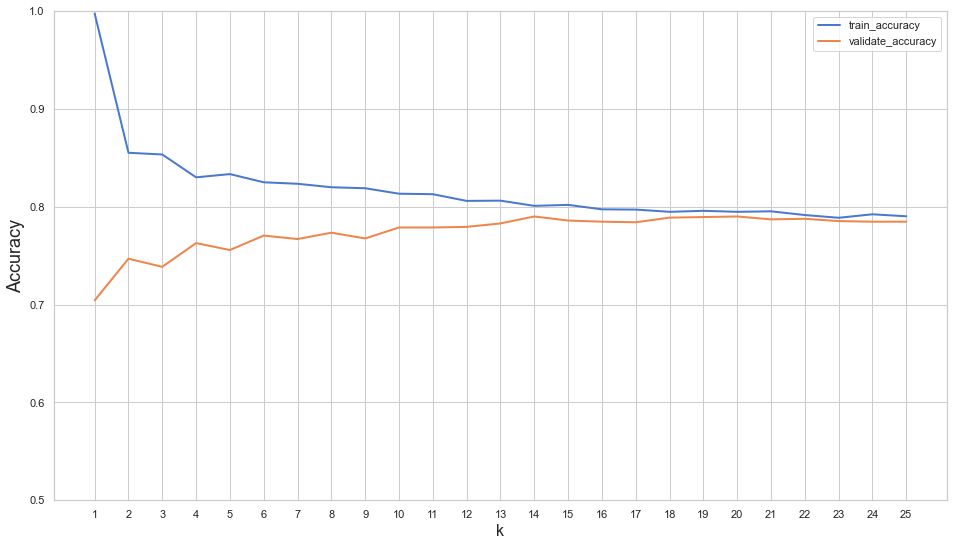

In [47]:
metrics = []
max_k = 26
# loop through different values of k
for k in range(1, max_k):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    difference = train_accuracy - validate_accuracy
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy,
        "difference": difference
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)
print(results)

# plot the data
results[['k', 'train_accuracy', 'validate_accuracy']].set_index('k').plot(figsize = (16,9), linewidth=2)
plt.ylim(0.50, 1)
plt.xlabel("k", fontsize = 16)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(np.arange(1, k+1, 1))
plt.grid(b=True)

### Logistic Regression

In [48]:
logit = LogisticRegression(C=.1, random_state=123)
logit.fit(X_train, y_train)
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 2.93789524e-01  3.89917093e-02 -1.36623574e-01 -5.45633901e-02
  -6.50993446e-01  2.17984660e-01 -4.76103395e-01 -1.49074028e-01
  -4.37490354e-02 -4.96278907e-01  1.84567474e-01  5.60570529e-02
   2.88321104e-01  1.05747462e-02  2.26823919e-04 -1.74124253e-01
  -1.33108023e-01  4.30540650e-01 -2.35197652e-01 -5.02575274e-01
  -4.77403519e-02  3.48479839e-01 -6.07971764e-01 -1.21024556e-01
  -1.29609371e-01  1.35301725e-01 -1.91900074e-01]]
Intercept: 
 [-0.3579526]


In [49]:
# Train Data
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)
print(confusion_matrix(y_train, y_pred))
print("")
print("Train Data:")
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

[[2605  292]
 [ 476  570]]

Train Data:


0            1  accuracy    macro avg  weighted avg
precision     0.845505     0.661253  0.805224     0.753379      0.796626
recall        0.899206     0.544933  0.805224     0.722070      0.805224
f1-score      0.871529     0.597484  0.805224     0.734507      0.798830
support    2897.000000  1046.000000  0.805224  3943.000000   3943.000000

In [50]:
# Validate Data
y_pred = logit.predict(X_validate)
y_pred_proba = logit.predict_proba(X_validate)
print(confusion_matrix(y_validate, y_pred))
print("")
print("Validate Data:")
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

[[1113  129]
 [ 208  241]]

Validate Data:


0           1  accuracy    macro avg  weighted avg
precision     0.842544    0.651351   0.80071     0.746947      0.791778
recall        0.896135    0.536748   0.80071     0.716442      0.800710
f1-score      0.868513    0.588523   0.80071     0.728518      0.794169
support    1242.000000  449.000000   0.80071  1691.000000   1691.000000

## Models with limited features

#### Features used:
- senior_citizen
- tenure
- monthly_charges
- monthly_contract
- fiber
- paperless_billing
- electronic_check

In [68]:
X_train_features = train[['senior_citizen', 'tenure', 'monthly_charges', 'monthly_contract', 'fiber', 'paperless_billing', 'electronic_check']]
y_train = train.churn

X_validate_features = validate[['senior_citizen', 'tenure', 'monthly_charges', 'monthly_contract', 'fiber', 'paperless_billing', 'electronic_check']]
y_validate = validate.churn

X_test_features = test[['senior_citizen', 'tenure', 'monthly_charges', 'monthly_contract', 'fiber', 'paperless_billing', 'electronic_check']]
y_test = test.churn

### Decision Tree

   max_depth  train_accuracy  validate_accuracy  difference
0          2        0.760588           0.769367   -0.008779
1          3        0.792037           0.793613   -0.001577
2          4        0.794319           0.781195    0.013124
3          5        0.798377           0.794205    0.004172
4          6        0.811058           0.787108    0.023949
5          7        0.817652           0.784743    0.032909
6          8        0.835912           0.778829    0.057083
7          9        0.852397           0.772915    0.079481


max_depth  train_accuracy  validate_accuracy  difference
0          2        0.760588           0.769367   -0.008779
1          3        0.792037           0.793613   -0.001577
2          4        0.794319           0.781195    0.013124
3          5        0.798377           0.794205    0.004172
4          6        0.811058           0.787108    0.023949
5          7        0.817652           0.784743    0.032909
6          8        0.835912           0.778829    0.057083
7          9        0.852397           0.772915    0.079481

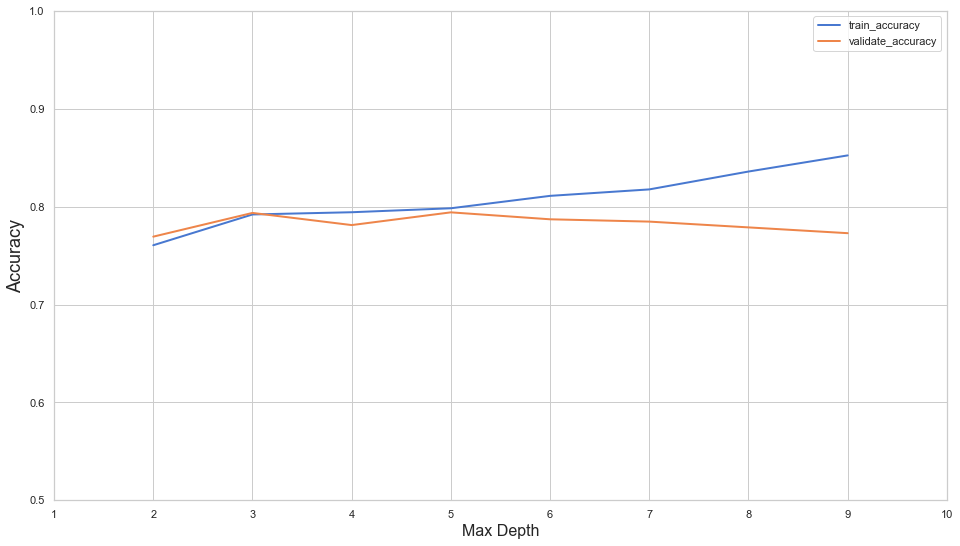

In [69]:
model.decision_tree(X_train_features, y_train, X_validate_features, y_validate, 0.1, 25)

### Random Forest

    max_depth  min_samples_leaf  train_accuracy  validate_accuracy  difference
0           2                 2        0.777581           0.777055    0.000526
1           2                 3        0.777581           0.777055    0.000526
2           2                 4        0.777581           0.777055    0.000526
3           2                 5        0.777581           0.777055    0.000526
4           2                 6        0.777581           0.777055    0.000526
5           3                 2        0.791529           0.795979   -0.004449
6           3                 3        0.791529           0.795979   -0.004449
7           3                 4        0.791529           0.795979   -0.004449
8           3                 5        0.791529           0.795979   -0.004449
9           3                 6        0.791529           0.795979   -0.004449
10          4                 2        0.799391           0.798344    0.001047
11          4                 3        0.799138     

max_depth  min_samples_leaf  train_accuracy  validate_accuracy  difference
0           2                 2        0.777581           0.777055    0.000526
1           2                 3        0.777581           0.777055    0.000526
2           2                 4        0.777581           0.777055    0.000526
3           2                 5        0.777581           0.777055    0.000526
4           2                 6        0.777581           0.777055    0.000526
5           3                 2        0.791529           0.795979   -0.004449
6           3                 3        0.791529           0.795979   -0.004449
7           3                 4        0.791529           0.795979   -0.004449
8           3                 5        0.791529           0.795979   -0.004449
9           3                 6        0.791529           0.795979   -0.004449
10          4                 2        0.799391           0.798344    0.001047
11          4                 3        0.799138           0.798344    0.000794
12          4                 4        0.798884           0.797753    0.001131
13          4                 5        0.797109           0.798936   -0.001827
14          4                 6        0.797616           0.798344   -0.000728
15          5                 2        0.803196           0.806032   -0.002836
16          5                 3        0.804210           0.805441   -0.001231
17          5                 4        0.804210           0.804849   -0.000639
18          5                 5        0.804210           0.806032   -0.001822
19          5                 6        0.802435           0.806623   -0.004189
20          6                 2        0.813086           0.803666    0.009420
21          6                 3        0.814608           0.803075    0.011533
22          6                 4        0.811565           0.803075    0.008490
23          6                 5        0.811565           0.803666    0.007898
24          6                 6        0.810043           0.801301    0.008742

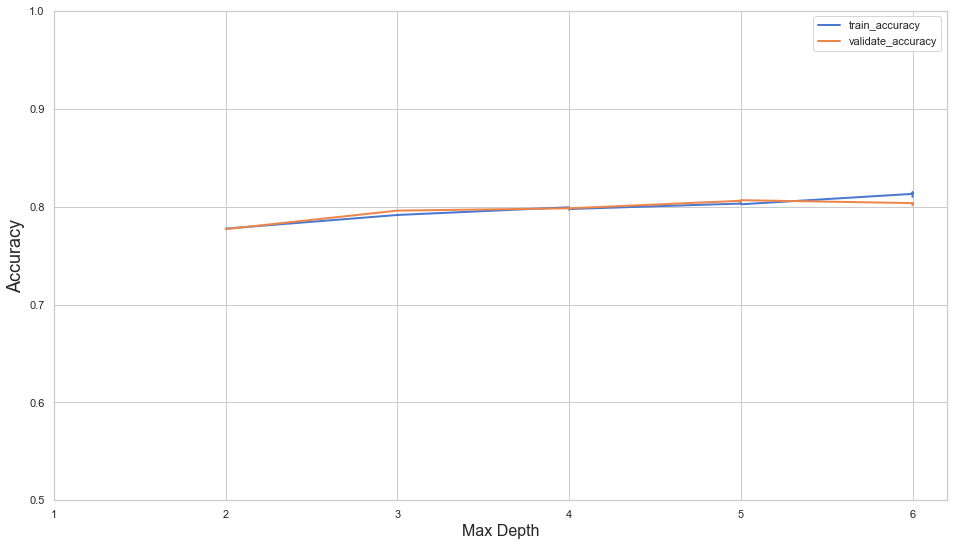

In [70]:
model.rand_forest(X_train_features, y_train, X_validate_features, y_validate, threshold=0.05, max_dep=7)

### KNN

     k  train_accuracy  validate_accuracy  difference
0    1        0.994928           0.724423    0.270504
1    2        0.865331           0.761679    0.103651
2    3        0.868882           0.758131    0.110750
3    4        0.836673           0.776464    0.060209
4    5        0.834136           0.779420    0.054716
5    6        0.827035           0.785334    0.041701
6    7        0.825260           0.775281    0.049979
7    8        0.819427           0.783560    0.035867
8    9        0.818412           0.788882    0.029530
9   10        0.814101           0.790656    0.023445
10  11        0.815369           0.792431    0.022938
11  12        0.808775           0.793613    0.015162
12  13        0.811818           0.791839    0.019979
13  14        0.802435           0.788291    0.014144
14  15        0.806239           0.788291    0.017948
15  16        0.800406           0.789474    0.010932
16  17        0.804464           0.792431    0.012033
17  18        0.804717      

k  train_accuracy  validate_accuracy  difference
0    1        0.994928           0.724423    0.270504
1    2        0.865331           0.761679    0.103651
2    3        0.868882           0.758131    0.110750
3    4        0.836673           0.776464    0.060209
4    5        0.834136           0.779420    0.054716
5    6        0.827035           0.785334    0.041701
6    7        0.825260           0.775281    0.049979
7    8        0.819427           0.783560    0.035867
8    9        0.818412           0.788882    0.029530
9   10        0.814101           0.790656    0.023445
10  11        0.815369           0.792431    0.022938
11  12        0.808775           0.793613    0.015162
12  13        0.811818           0.791839    0.019979
13  14        0.802435           0.788291    0.014144
14  15        0.806239           0.788291    0.017948
15  16        0.800406           0.789474    0.010932
16  17        0.804464           0.792431    0.012033
17  18        0.804717           0.790065    0.014652
18  19        0.803703           0.796570    0.007133
19  20        0.800913           0.796570    0.004343
20  21        0.801927           0.795387    0.006540
21  22        0.797616           0.792431    0.005186
22  23        0.800152           0.793022    0.007130
23  24        0.797616           0.793022    0.004594
24  25        0.796602           0.794796    0.001806

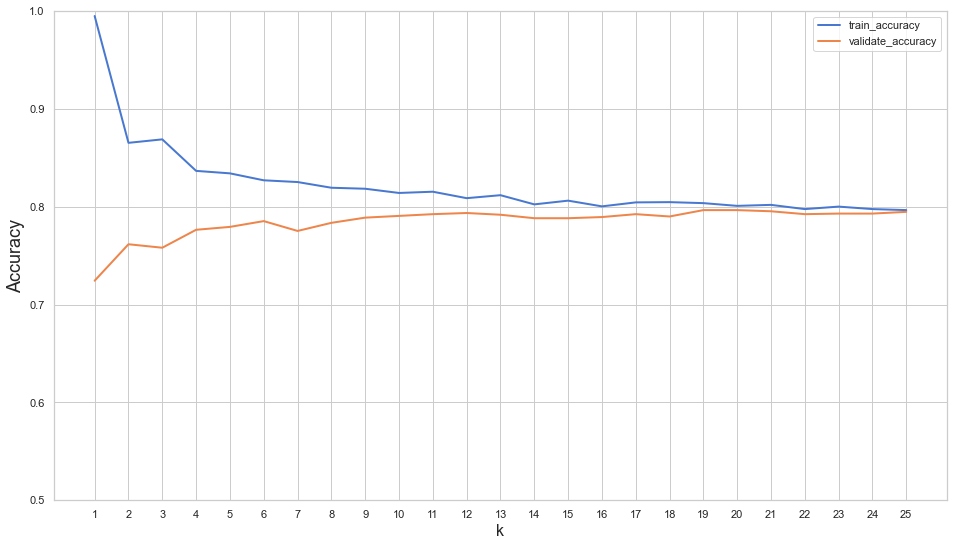

In [71]:
model.knn(X_train_features, y_train, X_validate_features, y_validate, 26)

### Logistic Regression

In [72]:
model.log_regression(X_train_features, y_train, X_validate_features, y_validate)

Coefficient: 
 [[ 0.39692952 -0.0351622   0.01225413  1.00813455  0.62240318  0.39142646
   0.45122789]]
Intercept: 
 [-2.43842138]
Train Confusion Matrix:
[[2599  298]
 [ 520  526]]

Train Data:
                     0            1  accuracy    macro avg  weighted avg
precision     0.833280     0.638350  0.792544     0.735815      0.781569
recall        0.897135     0.502868  0.792544     0.700002      0.792544
f1-score      0.864029     0.562567  0.792544     0.713298      0.784057
support    2897.000000  1046.000000  0.792544  3943.000000   3943.000000
Validate Confusion Matrix:
[[1126  116]
 [ 229  220]]

Validate Data:
                     0           1  accuracy    macro avg  weighted avg
precision     0.830996    0.654762  0.795979     0.742879      0.784202
recall        0.906602    0.489978  0.795979     0.698290      0.795979
f1-score      0.867154    0.560510  0.795979     0.713832      0.785733
support    1242.000000  449.000000  0.795979  1691.000000   1691.000000


(                     0            1  accuracy    macro avg  weighted avg
 precision     0.833280     0.638350  0.792544     0.735815      0.781569
 recall        0.897135     0.502868  0.792544     0.700002      0.792544
 f1-score      0.864029     0.562567  0.792544     0.713298      0.784057
 support    2897.000000  1046.000000  0.792544  3943.000000   3943.000000,
                      0           1  accuracy    macro avg  weighted avg
 precision     0.830996    0.654762  0.795979     0.742879      0.784202
 recall        0.906602    0.489978  0.795979     0.698290      0.795979
 f1-score      0.867154    0.560510  0.795979     0.713832      0.785733
 support    1242.000000  449.000000  0.795979  1691.000000   1691.000000)

## Modeling - with scaled data

In [57]:
# Scaling:
scaler = sklearn.preprocessing.MinMaxScaler() # Min Max Linear Scaler
scaler.fit(X_train) # Fit on Train
X_train_scaled = scaler.transform(X_train) # transform on train
X_validate_scaled = scaler.transform(X_validate) # transform on validate

### Decision Tree

   max_depth  train_accuracy  validate_accuracy  difference
0          2        0.760588           0.769367   -0.008779
1          3        0.792037           0.793613   -0.001577
2          4        0.794319           0.781195    0.013124
3          5        0.798377           0.794205    0.004172
4          6        0.811058           0.787108    0.023949
5          7        0.817652           0.784743    0.032909


max_depth  train_accuracy  validate_accuracy  difference
0          2        0.760588           0.769367   -0.008779
1          3        0.792037           0.793613   -0.001577
2          4        0.794319           0.781195    0.013124
3          5        0.798377           0.794205    0.004172
4          6        0.811058           0.787108    0.023949
5          7        0.817652           0.784743    0.032909

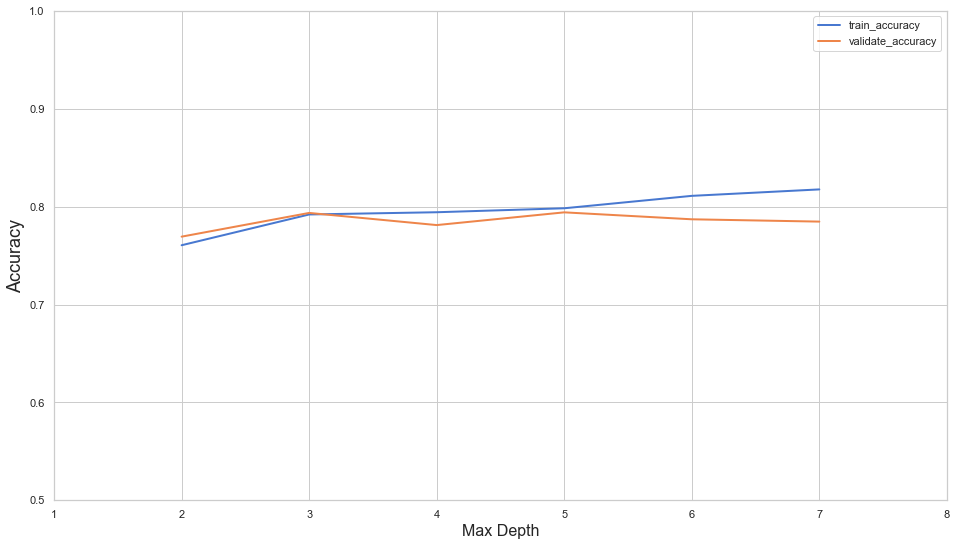

In [59]:
model.decision_tree(X_train_scaled, y_train, X_validate_scaled, y_validate, threshold=0.05, max_dep=25)

### Random Forest

    max_depth  min_samples_leaf  train_accuracy  validate_accuracy  difference
0           2                 2        0.777581           0.777055    0.000526
1           2                 3        0.777581           0.777055    0.000526
2           2                 4        0.777581           0.777055    0.000526
3           2                 5        0.777581           0.777055    0.000526
4           2                 6        0.777581           0.777055    0.000526
5           2                 7        0.777581           0.777055    0.000526
6           3                 2        0.791529           0.795979   -0.004449
7           3                 3        0.791529           0.795979   -0.004449
8           3                 4        0.791529           0.795979   -0.004449
9           3                 5        0.791529           0.795979   -0.004449
10          3                 6        0.791529           0.795979   -0.004449
11          3                 7        0.791529     

max_depth  min_samples_leaf  train_accuracy  validate_accuracy  difference
0           2                 2        0.777581           0.777055    0.000526
1           2                 3        0.777581           0.777055    0.000526
2           2                 4        0.777581           0.777055    0.000526
3           2                 5        0.777581           0.777055    0.000526
4           2                 6        0.777581           0.777055    0.000526
5           2                 7        0.777581           0.777055    0.000526
6           3                 2        0.791529           0.795979   -0.004449
7           3                 3        0.791529           0.795979   -0.004449
8           3                 4        0.791529           0.795979   -0.004449
9           3                 5        0.791529           0.795979   -0.004449
10          3                 6        0.791529           0.795979   -0.004449
11          3                 7        0.791529           0.795979   -0.004449
12          4                 2        0.799391           0.798344    0.001047
13          4                 3        0.799138           0.798344    0.000794
14          4                 4        0.798884           0.797753    0.001131
15          4                 5        0.797109           0.798936   -0.001827
16          4                 6        0.797616           0.798344   -0.000728
17          4                 7        0.796855           0.798344   -0.001489
18          5                 2        0.803196           0.806623   -0.003428
19          5                 3        0.804210           0.805441   -0.001231
20          5                 4        0.804210           0.804849   -0.000639
21          5                 5        0.804464           0.806032   -0.001568
22          5                 6        0.802435           0.806623   -0.004189
23          5                 7        0.801420           0.806032   -0.004612
24          6                 2        0.813340           0.804258    0.009082
25          6                 3        0.814355           0.803075    0.011279
26          6                 4        0.811565           0.803075    0.008490
27          6                 5        0.811565           0.803666    0.007898
28          6                 6        0.810297           0.801892    0.008404
29          6                 7        0.810043           0.805441    0.004603
30          7                 2        0.821709           0.798344    0.023365
31          7                 3        0.821709           0.799527    0.022182
32          7                 4        0.818920           0.801301    0.017619
33          7                 5        0.817905           0.800118    0.017787
34          7                 6        0.816891           0.798936    0.017955
35          7                 7        0.815623           0.797753    0.017870

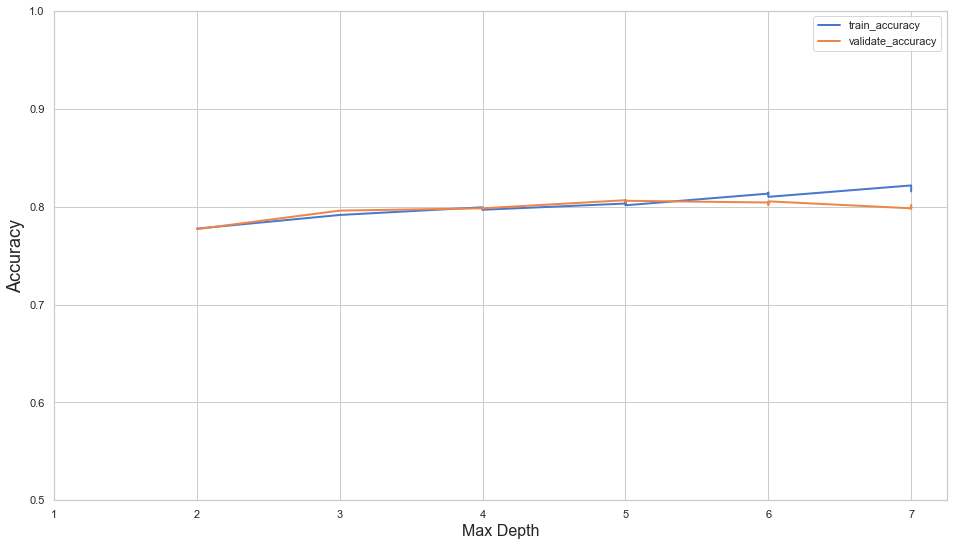

In [61]:
model.rand_forest(X_train_scaled, y_train, X_validate_scaled, y_validate, threshold=0.05, max_dep=8)

### KNN

     k  train_accuracy  validate_accuracy  difference
0    1        0.993913           0.740982    0.252932
1    2        0.866345           0.767593    0.098752
2    3        0.874207           0.752218    0.121990
3    4        0.846056           0.767593    0.078463
4    5        0.846564           0.768185    0.078379
5    6        0.830332           0.771733    0.058600
6    7        0.834644           0.765228    0.069416
7    8        0.827289           0.780603    0.046686
8    9        0.823992           0.777646    0.046346
9   10        0.822977           0.781195    0.041783
10  11        0.818412           0.779420    0.038992
11  12        0.817398           0.783560    0.033838
12  13        0.811818           0.790065    0.021753
13  14        0.814101           0.791248    0.022853
14  15        0.812579           0.778829    0.033750
15  16        0.807000           0.782377    0.024622
16  17        0.808014           0.784743    0.023271
17  18        0.810043      

k  train_accuracy  validate_accuracy  difference
0    1        0.993913           0.740982    0.252932
1    2        0.866345           0.767593    0.098752
2    3        0.874207           0.752218    0.121990
3    4        0.846056           0.767593    0.078463
4    5        0.846564           0.768185    0.078379
5    6        0.830332           0.771733    0.058600
6    7        0.834644           0.765228    0.069416
7    8        0.827289           0.780603    0.046686
8    9        0.823992           0.777646    0.046346
9   10        0.822977           0.781195    0.041783
10  11        0.818412           0.779420    0.038992
11  12        0.817398           0.783560    0.033838
12  13        0.811818           0.790065    0.021753
13  14        0.814101           0.791248    0.022853
14  15        0.812579           0.778829    0.033750
15  16        0.807000           0.782377    0.024622
16  17        0.808014           0.784743    0.023271
17  18        0.810043           0.787108    0.022935
18  19        0.809029           0.781195    0.027834
19  20        0.808775           0.784151    0.024624
20  21        0.809790           0.782377    0.027412
21  22        0.806239           0.788882    0.017357
22  23        0.809029           0.785925    0.023103
23  24        0.808521           0.787108    0.021413
24  25        0.806746           0.784151    0.022595

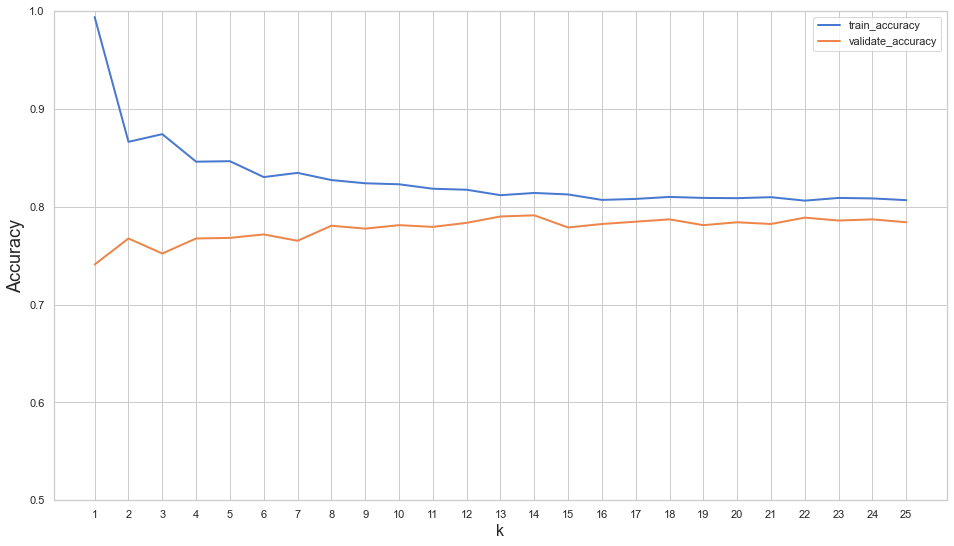

In [62]:
model.knn(X_train_scaled, y_train, X_validate_scaled, y_validate, max_k = 26)

### Logistic Regression

In [67]:
model.log_regression(X_train_scaled, y_train, X_validate_scaled, y_validate)

Coefficient: 
 [[ 0.40481277 -2.41072803  1.07867227  1.04960772  0.67163945  0.38836806
   0.45191979]]
Intercept: 
 [-2.23570309]
Train Confusion Matrix:
[[2602  295]
 [ 523  523]]

Train Data:
                     0            1  accuracy    macro avg  weighted avg
precision     0.832640     0.639364  0.792544     0.736002      0.781368
recall        0.898171     0.500000  0.792544     0.699085      0.792544
f1-score      0.864165     0.561159  0.792544     0.712662      0.783783
support    2897.000000  1046.000000  0.792544  3943.000000   3943.000000
Validate Confusion Matrix:
[[1127  115]
 [ 229  220]]

Validate Data:
                     0           1  accuracy    macro avg  weighted avg
precision     0.831121    0.656716   0.79657     0.743919      0.784812
recall        0.907407    0.489978   0.79657     0.698693      0.796570
f1-score      0.867590    0.561224   0.79657     0.714407      0.786243
support    1242.000000  449.000000   0.79657  1691.000000   1691.000000


(                     0            1  accuracy    macro avg  weighted avg
 precision     0.832640     0.639364  0.792544     0.736002      0.781368
 recall        0.898171     0.500000  0.792544     0.699085      0.792544
 f1-score      0.864165     0.561159  0.792544     0.712662      0.783783
 support    2897.000000  1046.000000  0.792544  3943.000000   3943.000000,
                      0           1  accuracy    macro avg  weighted avg
 precision     0.831121    0.656716   0.79657     0.743919      0.784812
 recall        0.907407    0.489978   0.79657     0.698693      0.796570
 f1-score      0.867590    0.561224   0.79657     0.714407      0.786243
 support    1242.000000  449.000000   0.79657  1691.000000   1691.000000)

## Modeling - Select features with scaled data¶

In [73]:
# Scaling:
scaler = sklearn.preprocessing.MinMaxScaler() # Min Max Linear Scaler
scaler.fit(X_train_features) # Fit on Train
X_train_scaled_features = scaler.transform(X_train_features) # transform on train
X_validate_scaled_features = scaler.transform(X_validate_features) # transform on validate

### Decision Tree

   max_depth  train_accuracy  validate_accuracy  difference
0          2        0.760588           0.769367   -0.008779
1          3        0.792037           0.793613   -0.001577
2          4        0.794319           0.781195    0.013124
3          5        0.798377           0.794205    0.004172
4          6        0.811058           0.787108    0.023949
5          7        0.817652           0.784743    0.032909


max_depth  train_accuracy  validate_accuracy  difference
0          2        0.760588           0.769367   -0.008779
1          3        0.792037           0.793613   -0.001577
2          4        0.794319           0.781195    0.013124
3          5        0.798377           0.794205    0.004172
4          6        0.811058           0.787108    0.023949
5          7        0.817652           0.784743    0.032909

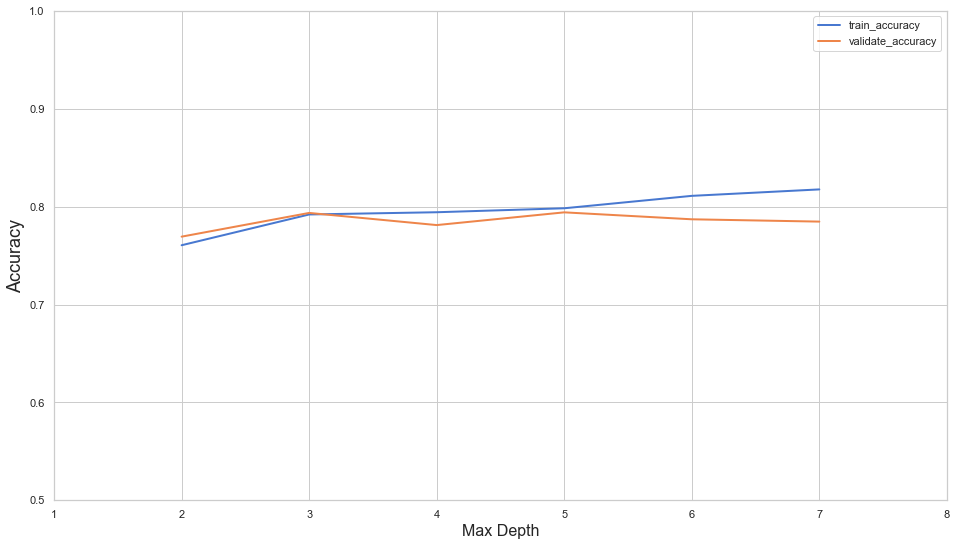

In [74]:
model.decision_tree(X_train_scaled_features, y_train, X_validate_scaled_features, y_validate, threshold=0.05, max_dep=25)

### Random Forest

    max_depth  min_samples_leaf  train_accuracy  validate_accuracy  difference
0           2                 2        0.777581           0.777055    0.000526
1           2                 3        0.777581           0.777055    0.000526
2           2                 4        0.777581           0.777055    0.000526
3           2                 5        0.777581           0.777055    0.000526
4           2                 6        0.777581           0.777055    0.000526
5           3                 2        0.791529           0.795979   -0.004449
6           3                 3        0.791529           0.795979   -0.004449
7           3                 4        0.791529           0.795979   -0.004449
8           3                 5        0.791529           0.795979   -0.004449
9           3                 6        0.791529           0.795979   -0.004449
10          4                 2        0.799391           0.798344    0.001047
11          4                 3        0.799138     

max_depth  min_samples_leaf  train_accuracy  validate_accuracy  difference
0           2                 2        0.777581           0.777055    0.000526
1           2                 3        0.777581           0.777055    0.000526
2           2                 4        0.777581           0.777055    0.000526
3           2                 5        0.777581           0.777055    0.000526
4           2                 6        0.777581           0.777055    0.000526
5           3                 2        0.791529           0.795979   -0.004449
6           3                 3        0.791529           0.795979   -0.004449
7           3                 4        0.791529           0.795979   -0.004449
8           3                 5        0.791529           0.795979   -0.004449
9           3                 6        0.791529           0.795979   -0.004449
10          4                 2        0.799391           0.798344    0.001047
11          4                 3        0.799138           0.798344    0.000794
12          4                 4        0.798884           0.797753    0.001131
13          4                 5        0.797109           0.798936   -0.001827
14          4                 6        0.797616           0.798344   -0.000728
15          5                 2        0.803196           0.806623   -0.003428
16          5                 3        0.804210           0.805441   -0.001231
17          5                 4        0.804210           0.804849   -0.000639
18          5                 5        0.804464           0.806032   -0.001568
19          5                 6        0.802435           0.806623   -0.004189
20          6                 2        0.813340           0.804258    0.009082
21          6                 3        0.814355           0.803075    0.011279
22          6                 4        0.811565           0.803075    0.008490
23          6                 5        0.811565           0.803666    0.007898
24          6                 6        0.810297           0.801892    0.008404

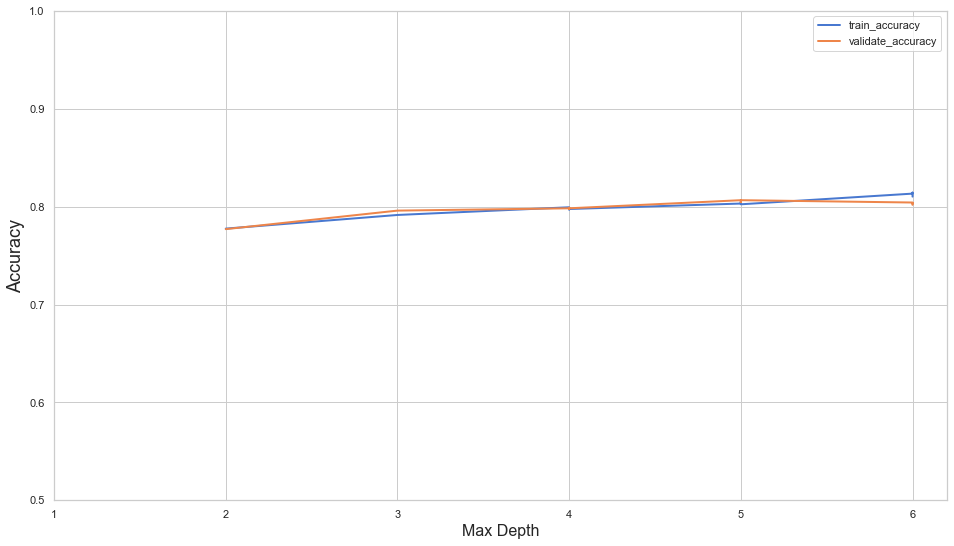

In [75]:
model.rand_forest(X_train_scaled_features, y_train, X_validate_scaled_features, y_validate, threshold=0.05, max_dep=7)

### KNN

     k  train_accuracy  validate_accuracy  difference
0    1        0.993913           0.740982    0.252932
1    2        0.866345           0.767593    0.098752
2    3        0.874207           0.752218    0.121990
3    4        0.846056           0.767593    0.078463
4    5        0.846564           0.768185    0.078379
5    6        0.830332           0.771733    0.058600
6    7        0.834644           0.765228    0.069416
7    8        0.827289           0.780603    0.046686
8    9        0.823992           0.777646    0.046346
9   10        0.822977           0.781195    0.041783
10  11        0.818412           0.779420    0.038992
11  12        0.817398           0.783560    0.033838
12  13        0.811818           0.790065    0.021753
13  14        0.814101           0.791248    0.022853
14  15        0.812579           0.778829    0.033750
15  16        0.807000           0.782377    0.024622
16  17        0.808014           0.784743    0.023271
17  18        0.810043      

k  train_accuracy  validate_accuracy  difference
0    1        0.993913           0.740982    0.252932
1    2        0.866345           0.767593    0.098752
2    3        0.874207           0.752218    0.121990
3    4        0.846056           0.767593    0.078463
4    5        0.846564           0.768185    0.078379
5    6        0.830332           0.771733    0.058600
6    7        0.834644           0.765228    0.069416
7    8        0.827289           0.780603    0.046686
8    9        0.823992           0.777646    0.046346
9   10        0.822977           0.781195    0.041783
10  11        0.818412           0.779420    0.038992
11  12        0.817398           0.783560    0.033838
12  13        0.811818           0.790065    0.021753
13  14        0.814101           0.791248    0.022853
14  15        0.812579           0.778829    0.033750
15  16        0.807000           0.782377    0.024622
16  17        0.808014           0.784743    0.023271
17  18        0.810043           0.787108    0.022935
18  19        0.809029           0.781195    0.027834
19  20        0.808775           0.784151    0.024624
20  21        0.809790           0.782377    0.027412
21  22        0.806239           0.788882    0.017357
22  23        0.809029           0.785925    0.023103
23  24        0.808521           0.787108    0.021413
24  25        0.806746           0.784151    0.022595

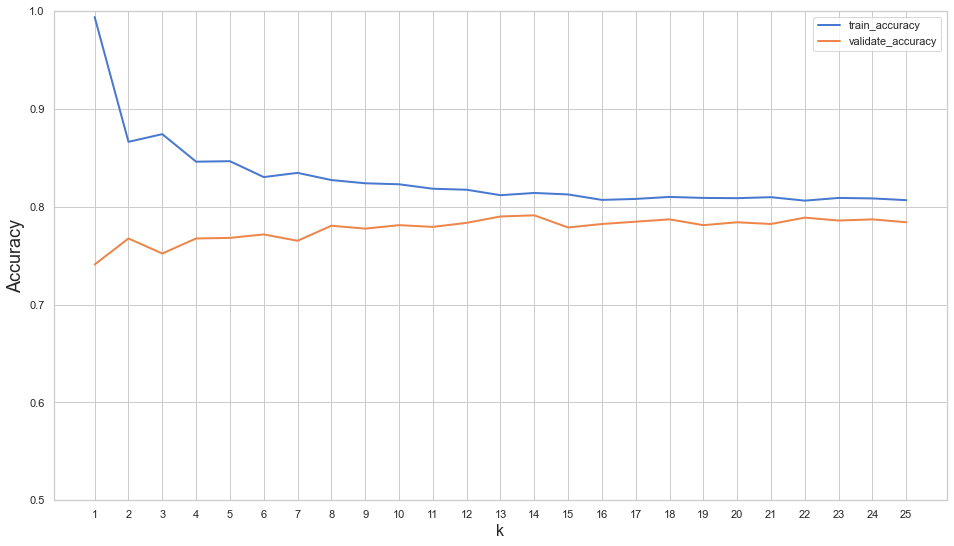

In [76]:
model.knn(X_train_scaled_features, y_train, X_validate_scaled_features, y_validate, max_k = 26)

### Logistic Regression

In [77]:
model.log_regression(X_train_scaled_features, y_train, X_validate_scaled_features, y_validate)

Coefficient: 
 [[ 0.40481277 -2.41072803  1.07867227  1.04960772  0.67163945  0.38836806
   0.45191979]]
Intercept: 
 [-2.23570309]
Train Confusion Matrix:
[[2602  295]
 [ 523  523]]

Train Data:
                     0            1  accuracy    macro avg  weighted avg
precision     0.832640     0.639364  0.792544     0.736002      0.781368
recall        0.898171     0.500000  0.792544     0.699085      0.792544
f1-score      0.864165     0.561159  0.792544     0.712662      0.783783
support    2897.000000  1046.000000  0.792544  3943.000000   3943.000000
Validate Confusion Matrix:
[[1127  115]
 [ 229  220]]

Validate Data:
                     0           1  accuracy    macro avg  weighted avg
precision     0.831121    0.656716   0.79657     0.743919      0.784812
recall        0.907407    0.489978   0.79657     0.698693      0.796570
f1-score      0.867590    0.561224   0.79657     0.714407      0.786243
support    1242.000000  449.000000   0.79657  1691.000000   1691.000000


(                     0            1  accuracy    macro avg  weighted avg
 precision     0.832640     0.639364  0.792544     0.736002      0.781368
 recall        0.898171     0.500000  0.792544     0.699085      0.792544
 f1-score      0.864165     0.561159  0.792544     0.712662      0.783783
 support    2897.000000  1046.000000  0.792544  3943.000000   3943.000000,
                      0           1  accuracy    macro avg  weighted avg
 precision     0.831121    0.656716   0.79657     0.743919      0.784812
 recall        0.907407    0.489978   0.79657     0.698693      0.796570
 f1-score      0.867590    0.561224   0.79657     0.714407      0.786243
 support    1242.000000  449.000000   0.79657  1691.000000   1691.000000)